## Implementing K Means Clustering

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata

{'uci_id': 544,
 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ',
 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition',
 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv',
 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ',
 'area': 'Health and Medicine',
 'tasks': ['Classification', 'Regression', 'Clustering'],
 'characteristics': ['Multivariate'],
 'num_instances': 2111,
 'num_features': 16,
 'feature_types': ['Integer'],
 'demographics': ['Gender', 'Age'],
 'target_col': ['NObeyesdad'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2019,
 'last_updated': 'Tue Sep 10 2024',
 'dataset_doi': '10.24432/C5H31Z',
 'creators': [],
 'intro_paper': 

In [4]:
# variable information 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables 


,name,role,type,demographic,description,units,missing_values
0,Gender,Feature,Categorical,Gender,None,None,no
1,Age,Feature,Continuous,Age,None,None,no
2,Height,Feature,Continuous,None,None,None,no
3,Weight,Feature,Continuous,None,None,None,no
4,family_history_with_overweight,Feature,Binary,None,Has a family member suffered or suffers from o...,None,no
5,FAVC,Feature,Binary,None,Do you eat high caloric food frequently?,None,no
6,FCVC,Feature,Integer,None,Do you usually eat vegetables in your meals?,None,no
7,NCP,Feature,Continuous,None,How many main meals do you have daily?,None,no
8,CAEC,Feature,Categorical,None,Do you eat any food between meals?,None,no
9,SMOKE,Feature,Binary,None,Do you smoke?,None,no


#### K means is distance based need to convert categorical to one hot

In [4]:
import pandas as pd
X_cat = pd.get_dummies(X,columns=['Gender','CAEC','CALC','MTRANS'],drop_first=True)

In [5]:
X_cat.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'Gender_Male',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [10]:
for col in X_cat.select_dtypes(include='object'):
    print(f"\nColumn: {col}")
    print(X_cat[col].value_counts())



Column: family_history_with_overweight
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

Column: FAVC
FAVC
yes    1866
no      245
Name: count, dtype: int64

Column: SMOKE
SMOKE
no     2067
yes      44
Name: count, dtype: int64

Column: SCC
SCC
no     2015
yes      96
Name: count, dtype: int64


In [11]:
yes_no_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
X_cat[yes_no_cols] = X_cat[yes_no_cols].replace({'yes': 1, 'no': 0})
bool_cols = X_cat.select_dtypes(include='bool').columns
X_cat[bool_cols] = X_cat[bool_cols].astype(int)
X_cat.dtypes

/tmp/ipykernel_1528/553270920.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_cat[yes_no_cols] = X_cat[yes_no_cols].replace({'yes': 1, 'no': 0})


Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
Gender_Male                         int64
CAEC_Frequently                     int64
CAEC_Sometimes                      int64
CAEC_no                             int64
CALC_Frequently                     int64
CALC_Sometimes                      int64
CALC_no                             int64
MTRANS_Bike                         int64
MTRANS_Motorbike                    int64
MTRANS_Public_Transportation        int64
MTRANS_Walking                      int64
dtype: object

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
X_train.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'Gender_Male',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [15]:
y.value_counts()

NObeyesdad         
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

### Clustering using sklearn

In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.preprocessing import StandardScaler


In [17]:
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)


,n_clusters,7
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [18]:
y_train_pred = kmeans.predict(X_train_scaled)
y_test_pred = kmeans.predict(X_test_scaled)

In [32]:
X_train.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'Gender_Male',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

In [31]:
import pandas as pd

y_train_pred_series = pd.Series(y_train_pred)
y_train_pred_series.value_counts()


1    485
4    484
2    437
5    193
0     45
3     37
6      7
Name: count, dtype: int64

##### why does sklearns silhouette score take as input y , it should be an unsupervised metric ?

In [19]:
print("Silhouette Score (train):", silhouette_score(X_train_scaled, y_train_pred))

Silhouette Score (train): 0.14430752792655943


In [20]:
print("Silhouette Score (train):", silhouette_score(X_test_scaled, y_test_pred))

Silhouette Score (train): 0.13324848789184765


In [22]:
y_train_flat = np.ravel(y_train)
y_test_flat = np.ravel(y_test)

In [24]:
print("Adjusted Rand Index (train):", adjusted_rand_score(y_train_flat, y_train_pred))
print("Adjusted Mutual Info (train):", adjusted_mutual_info_score(y_train_flat, y_train_pred))
print("Adjusted Rand Index (test):", adjusted_rand_score(y_test_flat, y_test_pred))
print("Adjusted Mutual Info (test):", adjusted_mutual_info_score(y_test_flat, y_test_pred))


Adjusted Rand Index (train): 0.191446193982683
Adjusted Mutual Info (train): 0.25884466273494106
Adjusted Rand Index (test): 0.17654555104468703
Adjusted Mutual Info (test): 0.2333970918910626


In [26]:
import pandas as pd

# y_train_flat = true labels (1D), y_train_pred = K-Means cluster assignments
cluster_vs_label = pd.crosstab(y_train_flat, y_train_pred, rownames=['True Class'], colnames=['Cluster'])
print(cluster_vs_label)


Cluster               0    1    2   3    4   5  6
True Class                                       
Insufficient_Weight   5   42   42   2   33  94  0
Normal_Weight        25   33   51   6   34  76  4
Obesity_Type_I        2   56  139   1   77   4  2
Obesity_Type_II       0    1   56   0  179   1  0
Obesity_Type_III      0  258    1   0    0   0  0
Overweight_Level_I    7   81   44  27   67   6  0
Overweight_Level_II   6   14  104   1   94  12  1


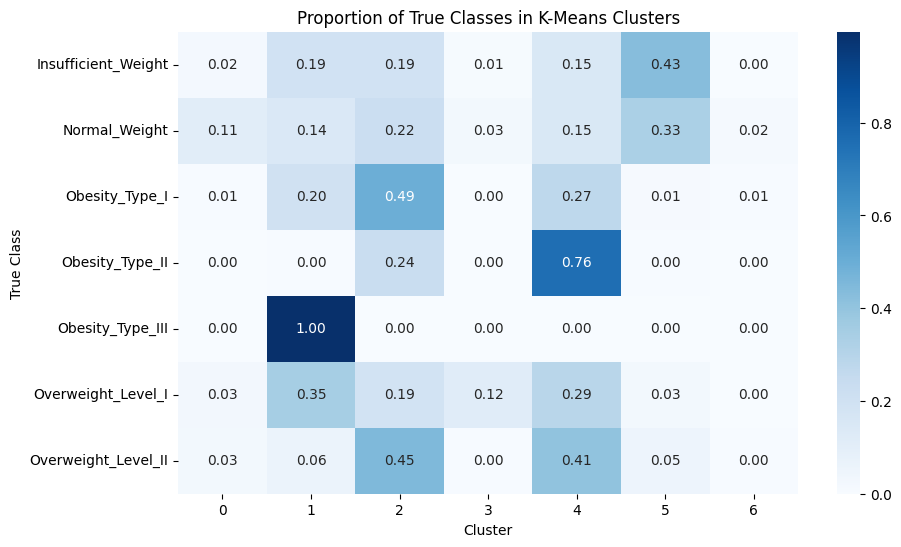

In [28]:
cluster_vs_label_norm = cluster_vs_label.div(cluster_vs_label.sum(axis=1), axis=0)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(cluster_vs_label_norm, annot=True, cmap='Blues', fmt='.2f')
plt.title("Proportion of True Classes in K-Means Clusters")
plt.show()


### Implementation from scratch

##### We have X_train_scaled, X_test_scaled need y_train_pred and y_test_pred

In [33]:
K = 7
n_samples_train, n_features = X_train_scaled.shape


In [36]:
n_features


23

In [59]:
X_train.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,...,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.310222,1.701758,86.549808,0.821682,0.879739,2.428400,2.688133,0.021919,2.017965,0.046209,...,0.111967,0.840047,0.023104,0.032583,0.662322,0.304502,0.002962,0.004147,0.750592,0.026659
std,6.392643,0.093884,26.053319,0.382893,0.325362,0.529317,0.775336,0.146464,0.613215,0.209999,...,0.315419,0.366671,0.150279,0.177595,0.473058,0.460333,0.054360,0.064282,0.432798,0.161132
min,15.000000,1.456346,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.918283,1.628799,65.137137,1.000000,1.000000,2.000000,2.663260,0.000000,1.622384,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,22.725431,1.701392,83.319978,1.000000,1.000000,2.414600,3.000000,0.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.770000,107.046109,1.000000,1.000000,3.000000,3.000000,0.000000,2.500827,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,1.980000,160.639405,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
# Column-wise mean
arr = X_train_scaled
col_means = np.mean(arr, axis=0)
print("Column means:", col_means)

# Column-wise standard deviation
col_stds = np.std(arr, axis=0, ddof=1)  # population std
print("Column stds:", col_stds)

Column means: [ 6.94547105e-17  4.56717339e-16 -1.46275830e-16  9.26062807e-17
 -1.30490668e-16  2.10468820e-17  2.82028219e-16 -6.94547105e-17
 -5.82472459e-16  1.78898497e-17 -1.21019571e-16  7.68211192e-17
 -1.47328174e-17 -6.31406460e-18 -1.03129722e-16  2.10468820e-18
 -3.36750112e-17 -9.10277646e-17 -4.31461081e-17  5.26172050e-18
 -3.15703230e-18 -5.05125168e-17  3.99890758e-17]
Column stds: [1.00029634 1.00029634 1.00029634 1.00029634 1.00029634 1.00029634
 1.00029634 1.00029634 1.00029634 1.00029634 1.00029634 1.00029634
 1.00029634 1.00029634 1.00029634 1.00029634 1.00029634 1.00029634
 1.00029634 1.00029634 1.00029634 1.00029634 1.00029634]


In [37]:
## randomly initialized centroids
centroids = np.random.randn(K, n_features)

In [61]:
centroids # 7 X 23

array([[-2.53757107,  0.72018558,  0.2592862 , -0.18949614,  1.01819416,
        -0.96955931, -1.11414709,  0.12977497,  0.44313143, -1.20345717,
        -0.43584036,  0.70877111,  1.60027179, -1.38917873,  0.56151752,
         0.33334047,  1.36892822,  0.34833986, -0.44499832,  0.14878278,
        -0.05815667,  0.18865328,  0.20646634],
       [-0.44809383,  0.01841254,  2.11391227, -0.30726483,  1.29986106,
        -0.99604486, -0.39350677, -0.83070885, -0.07000341,  0.17989149,
        -2.2837452 , -1.72127677,  1.28379542, -1.96650695, -1.9232255 ,
        -1.60636117, -0.73588552, -1.56627619,  2.20017251,  0.28707499,
         1.19354297,  0.00756245, -1.4657101 ],
       [ 0.27264756, -0.8490399 ,  0.44381746,  1.43565411,  0.23806814,
        -0.90390413, -0.55331346,  0.03806663,  0.24739857,  1.48733979,
        -2.34085746, -0.16770427,  0.1421228 , -0.50944564,  1.16513305,
        -0.80057295,  1.44025945, -0.94366995, -1.03422784, -0.83189473,
        -0.89379387,  0.5353

In [ ]:
D = np.ones((n_samples_train, K))*np.inf
for i in range(n_samples_train):
    x = X_train_scaled[i:]
    for j in range(centroids.shape[0]):
        D[i,j]= np.linalg.norm(x-centroids[j])

In [53]:
#y_train_pred = np.ones((n_samples_train,1))
y_train_pred = np.argmin(D, axis = 1 )
print(y_train_pred.shape)
        

(1688,)


In [54]:
pd.DataFrame(y_train_pred).value_counts()

0
4    1688
Name: count, dtype: int64

In [55]:
print("Silhouette Score (train):", silhouette_score(X_train_scaled, y_train_pred))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

### Data needs preprocessing all means are close to zero and stds to 1 all datapoints are close to only 1 point x = 0 vector

In [63]:
X_train.describe(include='all')

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,...,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000
mean,24.310222,1.701758,86.549808,0.821682,0.879739,2.428400,2.688133,0.021919,2.017965,0.046209,...,0.111967,0.840047,0.023104,0.032583,0.662322,0.304502,0.002962,0.004147,0.750592,0.026659
std,6.392643,0.093884,26.053319,0.382893,0.325362,0.529317,0.775336,0.146464,0.613215,0.209999,...,0.315419,0.366671,0.150279,0.177595,0.473058,0.460333,0.054360,0.064282,0.432798,0.161132
min,15.000000,1.456346,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.918283,1.628799,65.137137,1.000000,1.000000,2.000000,2.663260,0.000000,1.622384,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,22.725431,1.701392,83.319978,1.000000,1.000000,2.414600,3.000000,0.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.770000,107.046109,1.000000,1.000000,3.000000,3.000000,0.000000,2.500827,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,1.980000,160.639405,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
X.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
dtype: object

In [67]:
X_cat = pd.get_dummies(X,columns=['Gender','CAEC','CALC','MTRANS'],drop_first=True)
yes_no_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
X_cat[yes_no_cols] = X_cat[yes_no_cols].replace({'yes': 1, 'no': 0})
bool_cols = X_cat.select_dtypes(include='bool').columns
X_cat[bool_cols] = X_cat[bool_cols].astype(int)
# list othre continuous columns that might need scaling

cols_to_scale = ['Age','Weight','Height','FCVC','NCP','CH2O','FAF','TUE']

X_cat.describe()

/tmp/ipykernel_1528/1853367516.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_cat[yes_no_cols] = X_cat[yes_no_cols].replace({'yes': 1, 'no': 0})


,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,SCC,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,...,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,0.020843,2.008011,0.045476,...,0.114638,0.836097,0.024159,0.033160,0.663667,0.302700,0.003316,0.005211,0.748460,0.026528
std,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.142893,0.612953,0.208395,...,0.318660,0.370276,0.153580,0.179096,0.472566,0.459535,0.057502,0.072015,0.434001,0.160737
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,0.000000,1.584812,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,0.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,0.000000,2.477420,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,1.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
# Devide X_cat into train, test. 
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y, test_size=0.2, random_state=42, stratify=y
)

In [70]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train[cols_to_scale])
test_scaled = scaler.transform(X_test[cols_to_scale])

# use standard scaler on the chosen subset of columns

In [69]:
type(X_train)

pandas.core.frame.DataFrame

In [71]:
type(train_scaled)

numpy.ndarray

In [85]:
# 1️⃣ Copy the DataFrame (optional)
X_train_scaled = X_train.copy()

# 2️⃣ Apply StandardScaler
scaler = StandardScaler()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_scaled[cols_to_scale])

# 3️⃣ Convert whole DataFrame to NumPy array
X_train_scaled_array = X_train_scaled.values

print("Scaled DataFrame as array:\n", X_train_scaled_array)

Scaled DataFrame as array:
 [[-0.83092317  0.620541   -0.28986883 ...  0.          1.
   0.        ]
 [-0.36149465  0.51399505 -0.63541663 ...  0.          1.
   0.        ]
 [-0.98739934 -0.01873468 -1.19981136 ...  0.          1.
   0.        ]
 ...
 [-0.67760625  0.54979449 -1.21143044 ...  0.          1.
   0.        ]
 [ 2.22406223  0.68272121  1.22797852 ...  0.          0.
   0.        ]
 [-0.83092317 -0.12528063 -0.82738762 ...  0.          1.
   0.        ]]


In [80]:
X_test_scaled = X_test.copy()
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])
X_test_scaled_array = X_test_scaled.values

In [82]:
type((X_test_scaled_array))

numpy.ndarray

## tSNE

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [86]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train_scaled_array)  # shape -> (n_samples, 2)


/tmp/ipykernel_1528/213208547.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], cmap='viridis', s=50)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1112: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


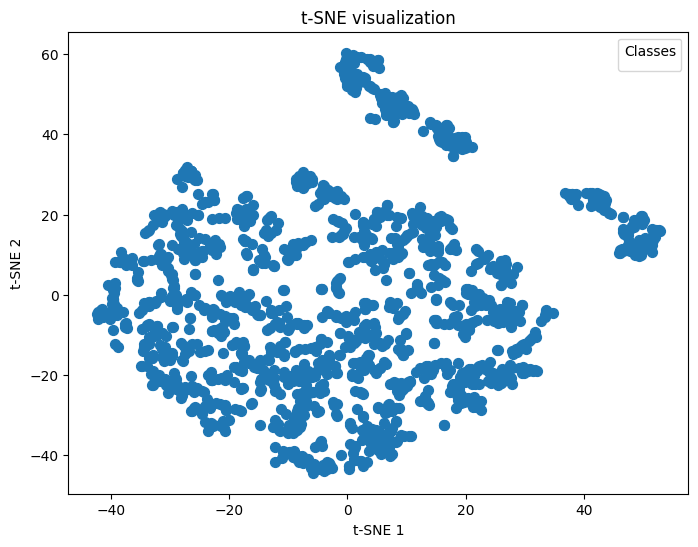

In [88]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], cmap='viridis', s=50)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE visualization")

# Add legend if you have labels
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()
